# Discovery of Multiple-Levels Association Rules from Large DB

### A method for mining mutiple-level association rules
#### ML_T2


> * _Jiawei Han_
> * _Yogiian Fu_

### Input :
* __1)__A herachy-infromation encoded transaction database T[1] wth the schema:
    * _Transaction (TID)_, in wich each item  in the itemset contains encoded concept  herarchy information.
    
    
* __2)__The minimun supp threshold (_minsupp[l])_ for each concept level l.


### Output
Large Item sets for mining strog ML assosiation rules for the relevant set of transaction data.

### Implementation 

In [3]:
import pandas as pd
from itertools import*
import numpy as np
from IPython.display import Image

### Example Data

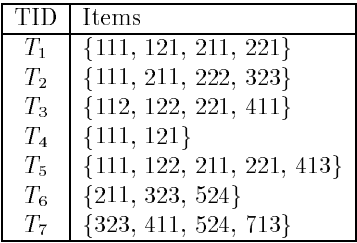

In [4]:
Image("../Images/1.png")

### Transaction Table  T[1]

In [5]:
T1 = pd.DataFrame({
    
    "TDI" : ["T10{}".format(i+1) for i in range(7)],
    "ItemSet": [["111","121","211","221"],
              ["111","211","222","323"],
              ["112","122","221","411"],
              ["111","211"],
              ["111","122","211","221","413"],
              ["211","323","524"],
              ["323","411","524","713"]]
})

In [6]:
T1

,TDI,ItemSet
0,T101,"[111, 121, 211, 221]"
1,T102,"[111, 211, 222, 323]"
2,T103,"[112, 122, 221, 411]"
3,T104,"[111, 211]"
4,T105,"[111, 122, 211, 221, 413]"
5,T106,"[211, 323, 524]"
6,T107,"[323, 411, 524, 713]"


### Procedures

In [7]:
def get_large_1_itemsets(minsupp,T,C,level,k):
    L = list()
    Ck = list(product(C,repeat=k))
    for i in Ck:
        supp = 0
        for it in T["ItemSet"]:                        
            for x in it:                
                if x[0:level] == "".join(i):
                    supp +=1
                    break
        if supp >= minsupp:
            L.append(["".join(i),supp])
    L11 = pd.DataFrame(data=np.array(L),columns=["ItemSet","Support"])
    return L11

In [8]:
def get_filtered_t_table(T,L11):
    L = list()
    for t in T["ItemSet"]: #Para cada item set de L11
        tp = list()
        for it in L11["ItemSet"]: 
            tp += list(filterfalse(lambda x: x[0] != it[0], t)) #Filtramos los valores
        L.append(tp)
    T2 = pd.DataFrame(data=np.array(L),columns=["ItemSet"])
    return T2 #ReTorna la tabla T1 ya filtrada con los valores de L11, es decir T2

In [9]:
def gen_candidate_set(level,k,memo):
    L = memo[level]
    S = list(combinations(list(L["ItemSet"]),k))
    return S

In [10]:
def gen_large_k_itemset(Ck,Tl,minsupp,l,k):
    L = list()
    for c in Ck:
        supp = 0
        A = set(c)
        for s in Tl:
            if A.issubset(s):
                supp += 1                
        if supp >= minsupp:
            L.append(["{} --- {}".format(c,supp)])                
    Llk = pd.DataFrame(data=np.array(L),columns=["L [{},{}]".format(l,k)])
    return Llk            

In [11]:
def gen_table_level_set(T,level):
    TL = list()
    for t in T["ItemSet"]:
        S = list()
        for x in t:
            S.append(x[:level])
        TL.append(set(S))
    return TL                    

### Algorithm 

In [12]:
memoLlk = dict()
T2 = None
for level in range(1,4):
    if level == 1:
        Ck = ["1","2","3","4","5","6","7"]
        Ll1 = get_large_1_itemsets(4,T1,Ck,1,1) #L de nivel 1 en grupos de tamaño 1
        memoLlk.update({level:Ll1})
        print("\nL[{},{}]\n".format(level,1),Ll1)
        T2 = get_filtered_t_table(T1,Ll1)
        print("\nFiltered Transaction Table T[2]\n",T2)
        C_Ll1 = list(Ll1["ItemSet"])
    else:        
        Ll1 = get_large_1_itemsets(3,T2,C_Ll1,level,level)
        memoLlk.update({level:Ll1})
        print("\nL[{},{}]\n".format(level,1),Ll1)
    if list(Ll1["ItemSet"]):
        k =2
        Tl = gen_table_level_set(T2,level)
        Ck = gen_candidate_set(level,k,memoLlk)
        while Ck:
            Llk = gen_large_k_itemset(Ck,Tl,3,level,k)
            if not Llk.empty:
                print(Llk) 
            k +=1
            Ck = gen_candidate_set(level,k,memoLlk)
    else: 
        break


L[1,1]
   ItemSet Support
0       1       5
1       2       6

Filtered Transaction Table T[2]
                 ItemSet
0  [111, 121, 211, 221]
1       [111, 211, 222]
2       [112, 122, 221]
3            [111, 211]
4  [111, 122, 211, 221]
5                 [211]
6                    []
            L [1,2]
0  ('1', '2') --- 5

L[2,1]
   ItemSet Support
0      11       5
1      12       3
2      21       5
3      22       4
              L [2,2]
0  ('11', '12') --- 3
1  ('11', '21') --- 4
2  ('11', '22') --- 4
3  ('12', '22') --- 3
4  ('21', '22') --- 3
                    L [2,3]
0  ('11', '12', '22') --- 3
1  ('11', '21', '22') --- 3

L[3,1]
   ItemSet Support
0     111       4
1     211       5
2     221       3
                L [3,2]
0  ('111', '211') --- 4
